# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pylenm** package!<br>
Let’s get started!


## Notebook roadmap

This demo is organized into short sections so you can follow it top-to-bottom.

- Inspection and pre-processing functions
- Correlation analysis functions
- PCA functions
- Clustering functions

> Tip: You can run the notebook cell-by-cell, or use **Run All** once the dependencies are installed.


## Setup
Make sure to install pylenm from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [ ]:
# pip install pylenm

In [1]:
# Import our packages
import pylenm
from pylenm import PylenmDataFactory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm_df.__version__`

In [2]:
pylenm.__version__

'0.2.2'

In [3]:
# --- Option A (default): load demo data locally ---
# If you cloned the repo, the demo data is under: notebooks/data/
url_1 = 'data/farea_data_thru_2015q3_reduced_demo.csv'
url_2 = 'data/farea_station_construction_data.csv'

# # --- Option B: load demo data directly from GitHub (no local repo needed) ---
# # Useful for running notebooks on Google Colab or when you don't have the repo cloned.
# raw_base = "https://raw.githubusercontent.com/hkzhao7/pylenm/main/notebooks/data/"
# url_1 = raw_base + "farea_data_thru_2015q3_reduced_demo.csv"
# url_2 = raw_base + "farea_station_construction_data.csv"

concentration_data = pd.read_csv(url_1)
construction_data = pd.read_csv(url_2)

# Create instance
pylenm_df = PylenmDataFactory(concentration_data) # Save concentration data
pylenm_df.simplify_data(inplace=True)
pylenm_df.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



## Inspection and pre-processing functions

 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [4]:
# We'll save a list of the analytes we want to look at and pass it to the functions below
# analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
pylenm_df.getCleanData(analytes)

ANALYTE_NAME    DEPTH_TO_WATER                                            \
STATION_ID            FBI-014D FBI-015D FBI-017D FEX-004 FIB-001 FIB-008   
COLLECTION_DATE                                                            
1990-01-01                 NaN      NaN      NaN     NaN     NaN     NaN   
1990-01-02                 NaN      NaN      NaN     NaN     NaN     NaN   
1990-01-03                 NaN      NaN      NaN     NaN     NaN     NaN   
1990-01-06                 NaN      NaN      NaN     NaN     NaN     NaN   
1990-01-07                 NaN      NaN      NaN     NaN     NaN     NaN   
...                        ...      ...      ...     ...     ...     ...   
2015-09-10                 NaN      NaN      NaN     NaN     NaN     NaN   
2015-09-21                 NaN      NaN      NaN     NaN     NaN     NaN   
2015-09-22                 NaN      NaN      NaN     NaN     NaN     NaN   
2015-09-23                 NaN      NaN      NaN     NaN     NaN     NaN   
2015-09-24                17.4     15.4    25.16     NaN     NaN     NaN   

ANALYTE_NAME                                         ... URANIUM-238           \
STATION_ID      FOB-001D FOB-002C FOB-002D FOB-013D  ...    FSP-002B FSP-002C   
COLLECTION_DATE                                      ...                        
1990-01-01           NaN      NaN      NaN      NaN  ...         NaN      NaN   
1990-01-02           NaN      NaN      NaN      NaN  ...         NaN      NaN   
1990-01-03           NaN      NaN      NaN      NaN  ...         NaN      NaN   
1990-01-06           NaN      NaN      NaN      NaN  ...         NaN      NaN   
1990-01-07           NaN      NaN      NaN      NaN  ...         NaN      NaN   
...                  ...      ...      ...      ...  ...         ...      ...   
2015-09-10           NaN      NaN      NaN      NaN  ...         NaN      NaN   
2015-09-21           NaN      NaN      NaN      NaN  ...         NaN      NaN   
2015-09-22           NaN      NaN      NaN      NaN  ...         NaN      NaN   
2015-09-23           NaN      NaN      NaN      NaN  ...         NaN      NaN   
2015-09-24           NaN      NaN      NaN     21.5  ...         NaN      NaN   

ANALYTE_NAME                                                           \
STATION_ID      FSP-012A FSP-047A FSP-072A FSP-072B FSP-204A FSP-226A   
COLLECTION_DATE                                                         
1990-01-01           NaN      NaN      NaN      NaN      NaN      NaN   
1990-01-02           NaN      NaN      NaN      NaN      NaN      NaN   
1990-01-03           NaN      NaN      NaN      NaN      NaN      NaN   
1990-01-06           NaN      NaN      NaN      NaN      NaN      NaN   
1990-01-07           NaN      NaN      NaN      NaN      NaN      NaN   
...                  ...      ...      ...      ...      ...      ...   
2015-09-10           NaN      NaN      NaN      NaN      NaN      NaN   
2015-09-21           NaN      NaN      NaN      NaN      NaN      NaN   
2015-09-22           NaN      NaN      NaN      NaN      NaN      NaN   
2015-09-23           NaN      NaN      NaN      NaN      NaN      NaN   
2015-09-24           NaN      NaN      NaN      NaN      NaN      NaN   

ANALYTE_NAME                       
STATION_ID      FSP-249A FSP-249B  
COLLECTION_DATE                    
1990-01-01           NaN      NaN  
1990-01-02           NaN      NaN  
1990-01-03           NaN      NaN  
1990-01-06           NaN      NaN  
1990-01-07           NaN      NaN  
...                  ...      ...  
2015-09-10           NaN      NaN  
2015-09-21           NaN      NaN  
2015-09-22           NaN      NaN  
2015-09-23           NaN      NaN  
2015-09-24           NaN      NaN  

[2421 rows x 773 columns]

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [5]:
lags = [1,3,7,12]
shared_dates = pylenm_df.getCommonDates(analytes=analytes, lag=lags)
shared_dates

Date Ranges Number of wells
Dates      Lag                                         
1990-01-01 1    1989-12-31 - 1990-01-02              16
           3    1989-12-29 - 1990-01-04              24
           7    1989-12-25 - 1990-01-08              41
           12   1989-12-20 - 1990-01-13              53
1990-01-02 1    1990-01-01 - 1990-01-03              14
...                                 ...             ...
2015-09-23 12   2015-09-11 - 2015-10-05              15
2015-09-24 1    2015-09-23 - 2015-09-25               8
           3    2015-09-21 - 2015-09-27              14
           7    2015-09-17 - 2015-10-01              15
           12   2015-09-12 - 2015-10-06              15

[9684 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

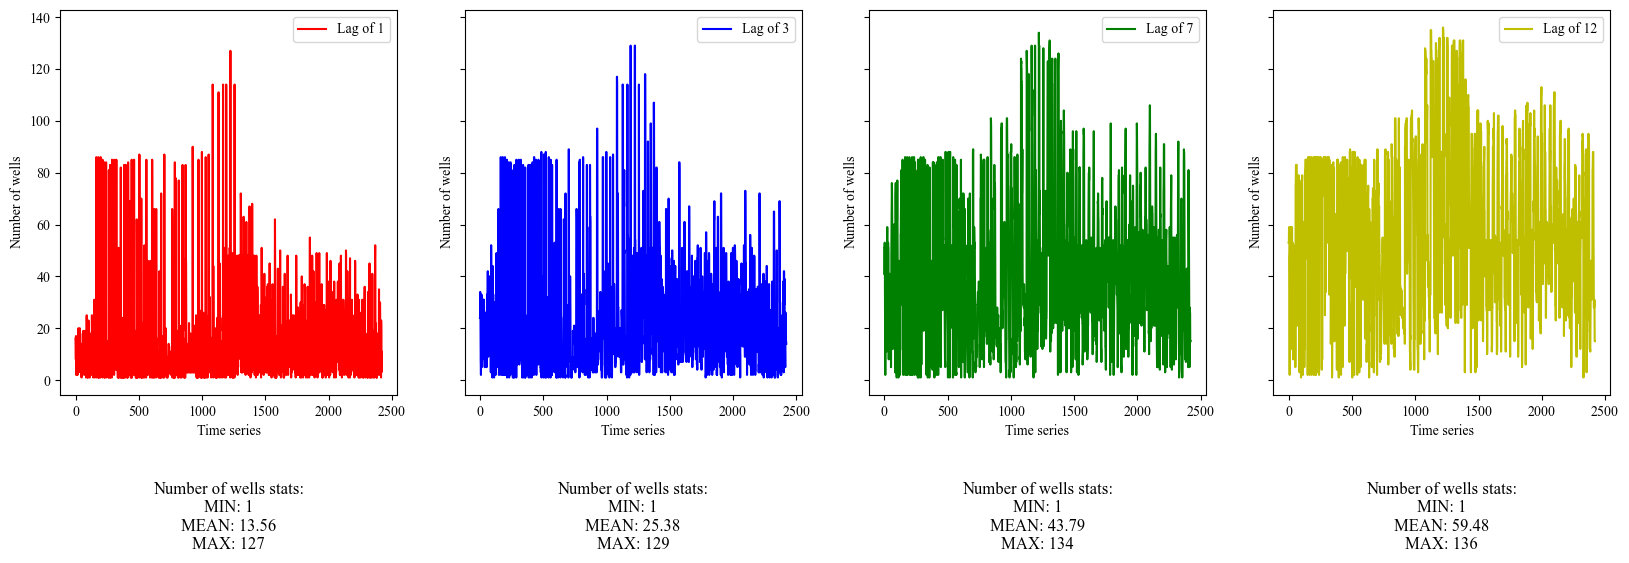

In [6]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of wells'])
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of wells')
    stats_text = str('Number of wells stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [7]:
lag = 12
jointData = pylenm_df.getJointData(analytes, lag=lag)
jointData

GENERATING DATA WITH A LAG OF 12.
Progress:
1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%, 11%, 12%, 13%, 14%, 15%, 16%, 17%, 18%, 19%, 20%, 21%, 22%, 23%, 24%, 25%, 26%, 27%, 28%, 29%, 30%, 31%, 32%, 33%, 34%, 35%, 36%, 37%, 38%, 39%, 40%, 41%, 42%, 43%, 44%, 45%, 46%, 47%, 48%, 49%, 50%, 51%, 52%, 53%, 54%, 55%, 56%, 57%, 58%, 59%, 60%, 61%, 62%, 63%, 64%, 65%, 66%, 67%, 68%, 69%, 70%, 71%, 72%, 73%, 74%, 75%, 76%, 77%, 78%, 79%, 80%, 81%, 82%, 83%, 84%, 85%, 86%, 87%, 88%, 89%, 90%, 91%, 92%, 93%, 94%, 95%, 96%, 97%, 98%, 99%, Completed


ANALYTE_NAME            DEPTH_TO_WATER                                    \
STATION_ID                    FBI-014D FBI-015D FBI-017D FEX-004 FIB-001   
1989-12-20 - 1990-01-13            NaN      NaN      NaN     NaN     NaN   
1989-12-21 - 1990-01-14            NaN      NaN      NaN     NaN     NaN   
1989-12-22 - 1990-01-15            NaN      NaN      NaN     NaN     NaN   
1989-12-25 - 1990-01-18            NaN      NaN      NaN     NaN     NaN   
1989-12-26 - 1990-01-19            NaN      NaN      NaN     NaN     NaN   
...                                ...      ...      ...     ...     ...   
2015-08-29 - 2015-09-22            NaN      NaN      NaN     NaN     NaN   
2015-09-09 - 2015-10-03           17.4     15.4    25.16     NaN     NaN   
2015-09-10 - 2015-10-04           17.4     15.4    25.16     NaN     NaN   
2015-09-11 - 2015-10-05           17.4     15.4    25.16     NaN     NaN   
2015-09-12 - 2015-10-06           17.4     15.4    25.16     NaN     NaN   

ANALYTE_NAME                                                         ...  \
STATION_ID              FIB-008 FOB-001D FOB-002C FOB-002D FOB-013D  ...   
1989-12-20 - 1990-01-13     NaN      NaN      NaN      NaN      NaN  ...   
1989-12-21 - 1990-01-14     NaN      NaN      NaN      NaN      NaN  ...   
1989-12-22 - 1990-01-15     NaN      NaN      NaN      NaN      NaN  ...   
1989-12-25 - 1990-01-18     NaN      NaN      NaN      NaN      NaN  ...   
1989-12-26 - 1990-01-19     NaN      NaN      NaN      NaN      NaN  ...   
...                         ...      ...      ...      ...      ...  ...   
2015-08-29 - 2015-09-22     NaN      NaN      NaN      NaN      NaN  ...   
2015-09-09 - 2015-10-03     NaN      NaN      NaN      NaN     21.5  ...   
2015-09-10 - 2015-10-04     NaN      NaN      NaN      NaN     21.5  ...   
2015-09-11 - 2015-10-05     NaN      NaN      NaN      NaN     21.5  ...   
2015-09-12 - 2015-10-06     NaN      NaN      NaN      NaN     21.5  ...   

ANALYTE_NAME            URANIUM-238                                      \
STATION_ID                 FSP-002B FSP-002C FSP-012A FSP-047A FSP-072A   
1989-12-20 - 1990-01-13         NaN      NaN      NaN      NaN      NaN   
1989-12-21 - 1990-01-14         NaN      NaN      NaN      NaN      NaN   
1989-12-22 - 1990-01-15         NaN      NaN      NaN      NaN      NaN   
1989-12-25 - 1990-01-18         NaN      NaN      NaN      NaN      NaN   
1989-12-26 - 1990-01-19         NaN      NaN      NaN      NaN      NaN   
...                             ...      ...      ...      ...      ...   
2015-08-29 - 2015-09-22       0.237      NaN     1.02      NaN    0.104   
2015-09-09 - 2015-10-03         NaN      NaN      NaN      NaN      NaN   
2015-09-10 - 2015-10-04         NaN      NaN      NaN      NaN      NaN   
2015-09-11 - 2015-10-05         NaN      NaN      NaN      NaN      NaN   
2015-09-12 - 2015-10-06         NaN      NaN      NaN      NaN      NaN   

ANALYTE_NAME                                                          
STATION_ID              FSP-072B FSP-204A FSP-226A FSP-249A FSP-249B  
1989-12-20 - 1990-01-13      NaN      NaN      NaN      NaN      NaN  
1989-12-21 - 1990-01-14      NaN      NaN      NaN      NaN      NaN  
1989-12-22 - 1990-01-15      NaN      NaN      NaN      NaN      NaN  
1989-12-25 - 1990-01-18      NaN      NaN      NaN      NaN      NaN  
1989-12-26 - 1990-01-19      NaN      NaN      NaN      NaN      NaN  
...                          ...      ...      ...      ...      ...  
2015-08-29 - 2015-09-22   0.0457    0.479      NaN    0.287    0.169  
2015-09-09 - 2015-10-03      NaN      NaN      NaN      NaN      NaN  
2015-09-10 - 2015-10-04      NaN      NaN      NaN      NaN      NaN  
2015-09-11 - 2015-10-05      NaN      NaN      NaN      NaN      NaN  
2015-09-12 - 2015-10-06      NaN      NaN      NaN      NaN      NaN  

[2421 rows x 773 columns]

## Correlation analysis functions

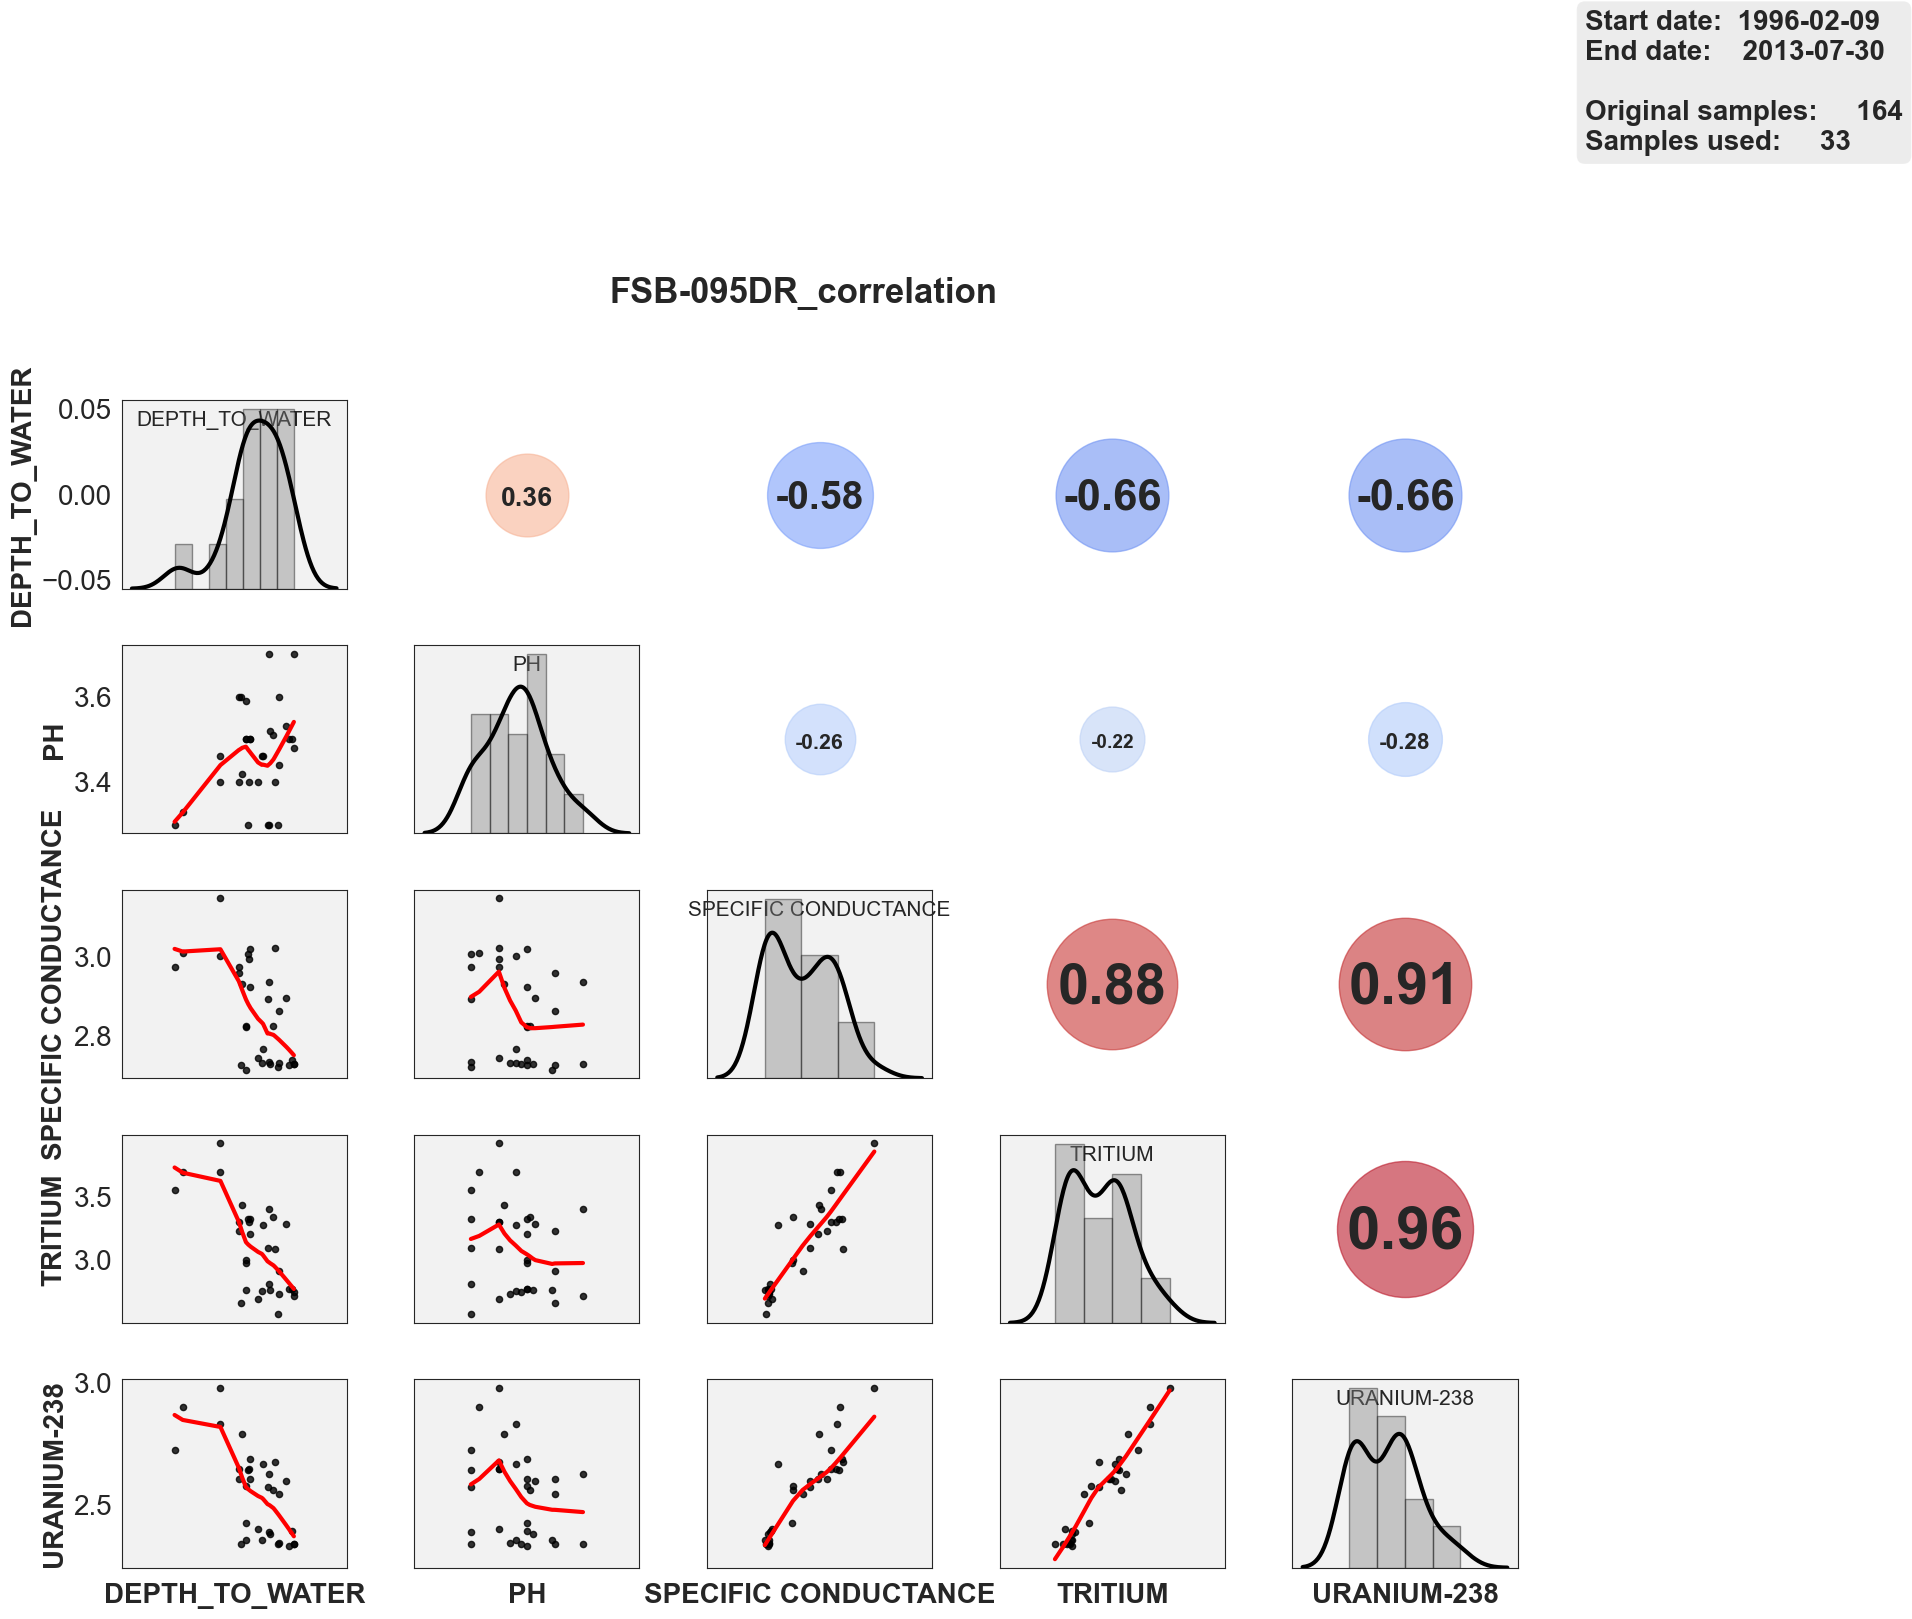

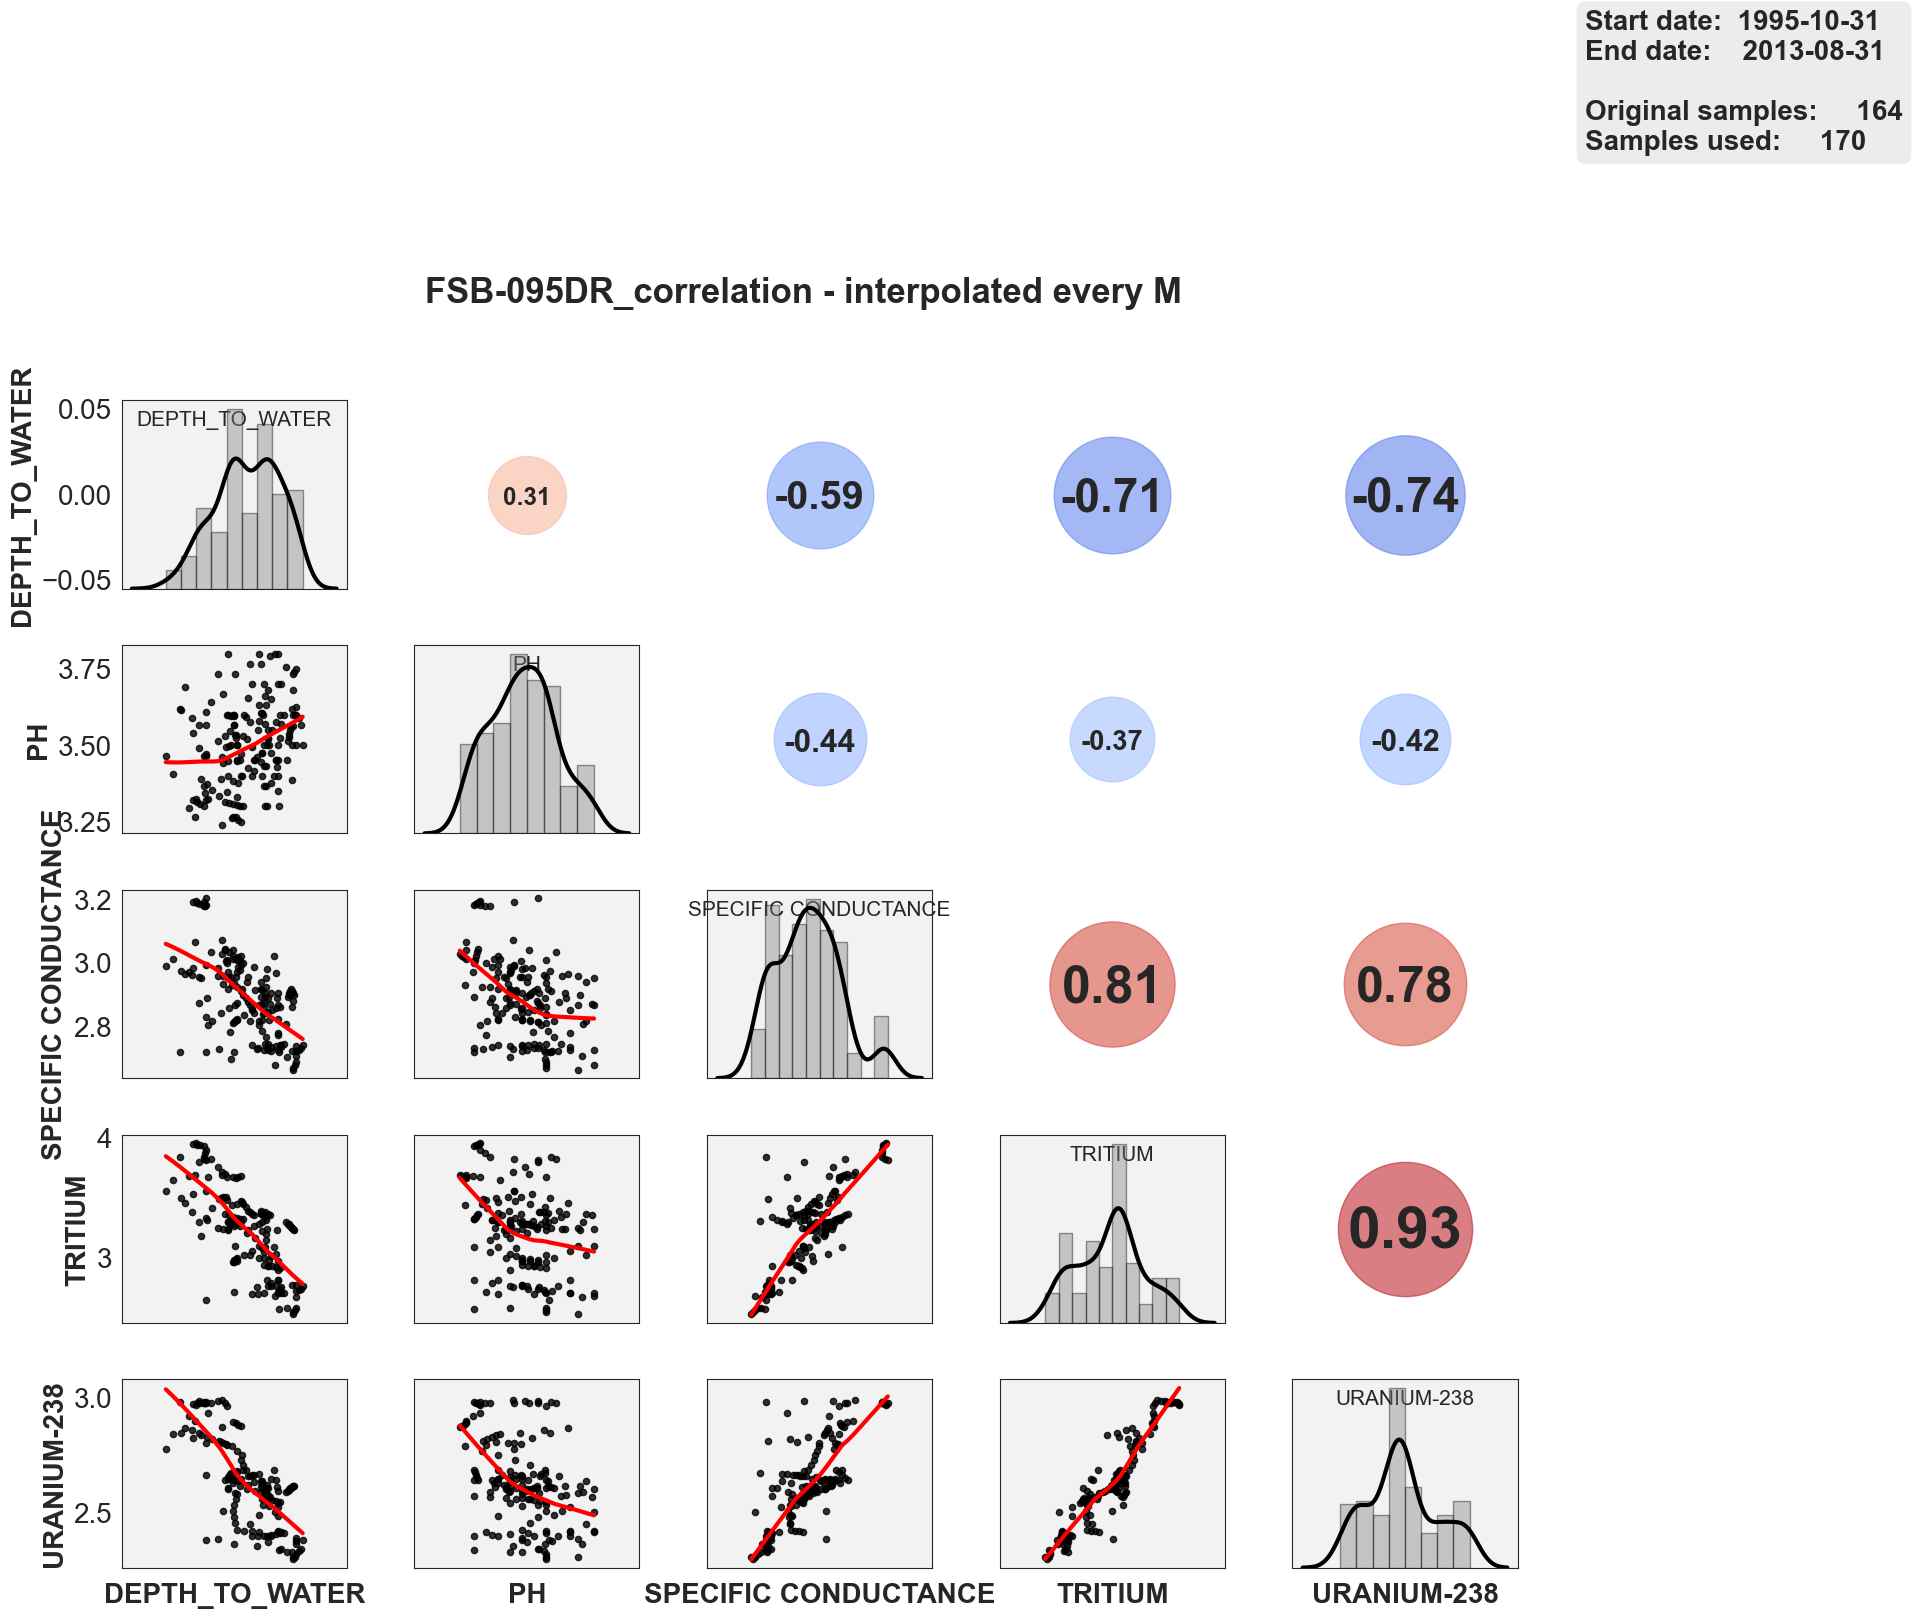

In [8]:
pylenm_df.plot_corr_by_well(well_name='FSB-095DR', analytes=analytes, log_transform=True, remove_outliers=True, z_threshold=1.3, remove=['1999-07-28'], no_log=['PH'])


pylenm_df.plot_corr_by_well(well_name='FSB-095DR', analytes=analytes,
                            interpolate=True, frequency='M', 
                            remove_outliers=True, z_threshold=1.3, log_transform=True, remove=['1999-07-28'], no_log=['PH'])

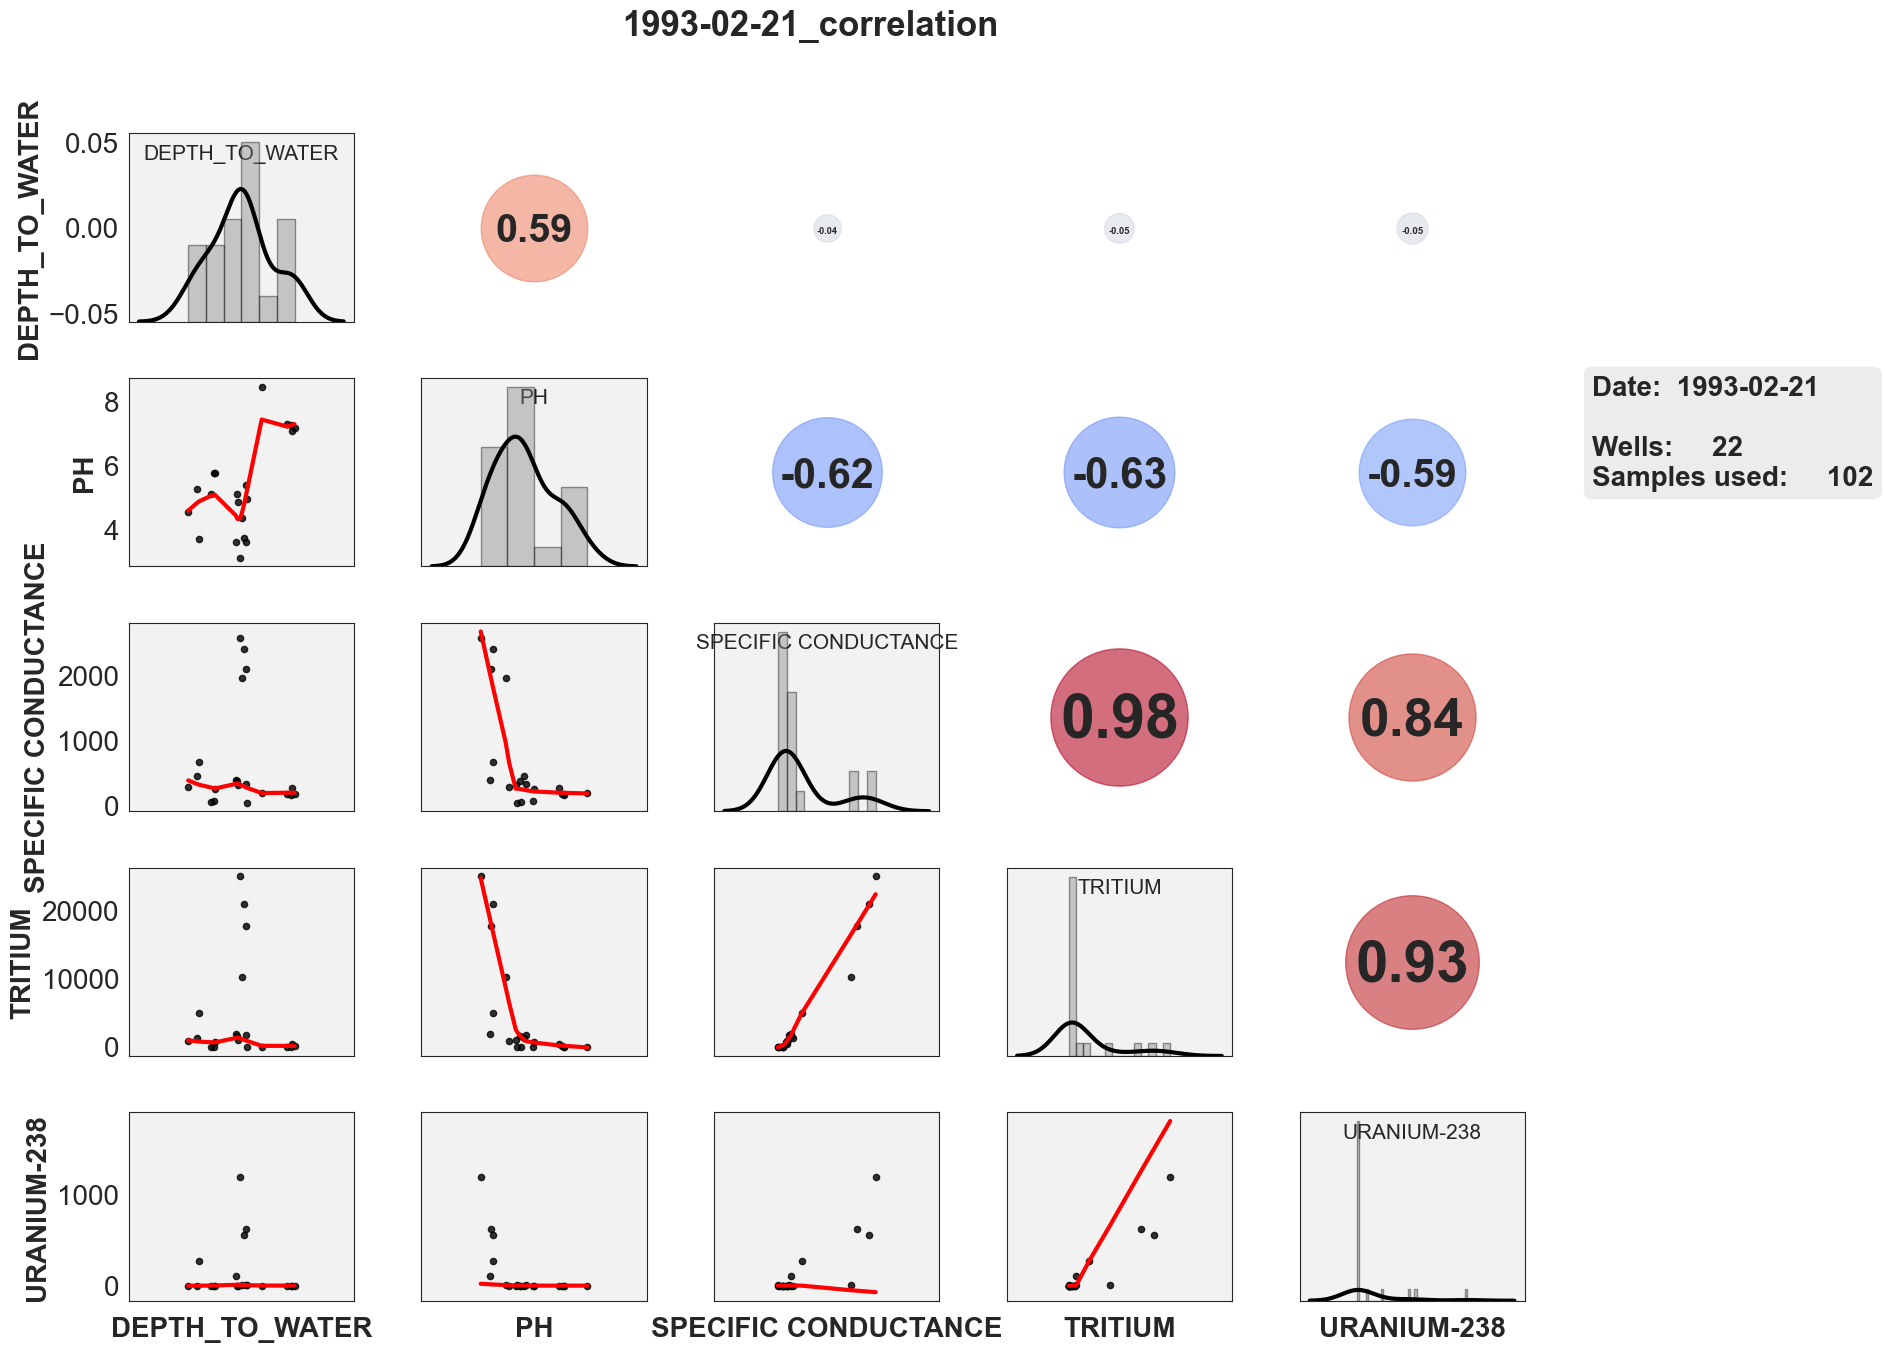

In [11]:
corr_by_date_demo_df = pylenm_df.plot_corr_by_date_range('1993-02-21', analytes=analytes, returnData=True)

In [12]:
corr_by_date_demo_df

ANALYTE_NAME  DEPTH_TO_WATER     PH  SPECIFIC CONDUCTANCE   TRITIUM  \
STATION_ID                                                            
FSB-091C               66.76  4.875            314.500000    946.00   
FSB-091D               63.92  3.600            381.000000   1820.00   
FSB-093C               65.75  5.100            374.000000   1510.00   
FSB-094C               71.40  4.370           1955.000000  10200.00   
FSB-094DR              69.11  3.115           2585.000000  25000.00   
FSB-096AR             127.52  7.315            175.500000      9.06   
FSB-097A              133.39  7.070            266.333333    335.00   
FSB-097C               76.40  3.615           2095.000000  17700.00   
FSB-097D               73.88  3.735           2415.000000  20900.00   
FSB-098AR             131.98  7.280            157.000000     15.30   
FSB-098C               74.36    NaN                   NaN       NaN   
FSB-098D               71.25    NaN                   NaN       NaN   
FSB-099A              136.36  7.180            162.000000    115.00   
FSB-099C               76.59  5.390            318.500000   1700.00   
FSB-099D               78.15  4.960             36.000000     34.90   
FSB-102C                5.19  4.545            280.500000    897.00   
FSB-103C               38.06  5.775            242.000000    675.00   
FSB-104C               16.67  5.280            441.000000   1270.00   
FSB-104D               18.65  3.720            659.500000   4920.00   
FSB-114A               95.86  8.470            184.000000      0.70   
FSB-114C               37.40  5.765             57.500000      3.09   
FSB-114D               33.52  5.120             47.000000      8.86   

ANALYTE_NAME  URANIUM-238  
STATION_ID                 
FSB-091C             1.81  
FSB-091D           102.00  
FSB-093C             1.00  
FSB-094C            10.30  
FSB-094DR         1190.00  
FSB-096AR            1.00  
FSB-097A             1.00  
FSB-097C           622.50  
FSB-097D           559.00  
FSB-098AR            1.00  
FSB-098C              NaN  
FSB-098D              NaN  
FSB-099A             1.00  
FSB-099C             5.57  
FSB-099D             8.08  
FSB-102C             1.00  
FSB-103C             1.00  
FSB-104C             1.00  
FSB-104D           273.00  
FSB-114A             1.17  
FSB-114C             1.00  
FSB-114D             1.00

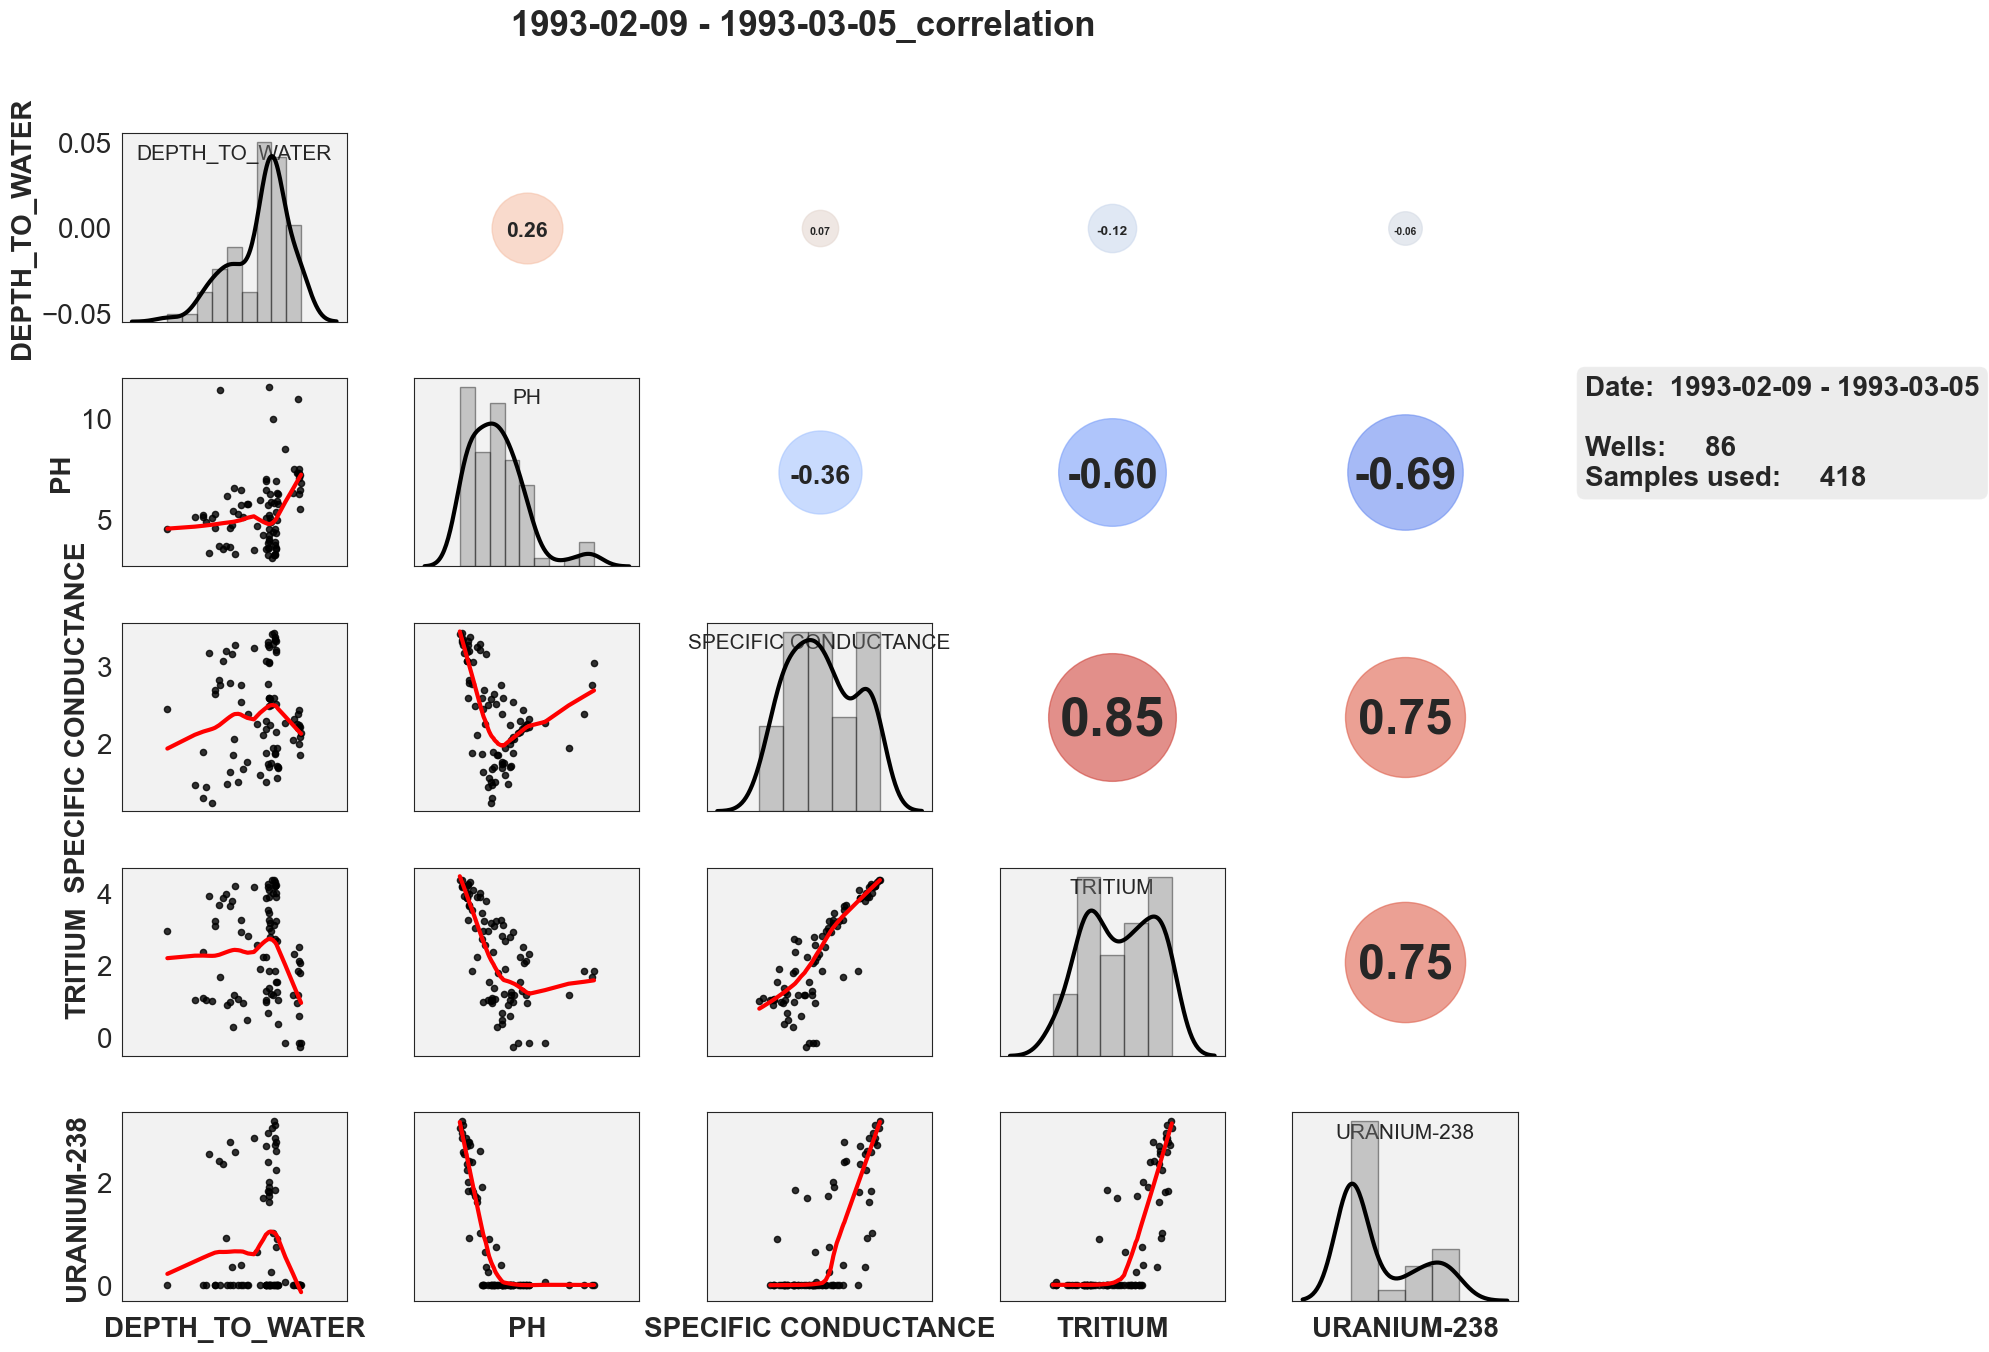

In [10]:
pylenm_df.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True, no_log=['PH'])

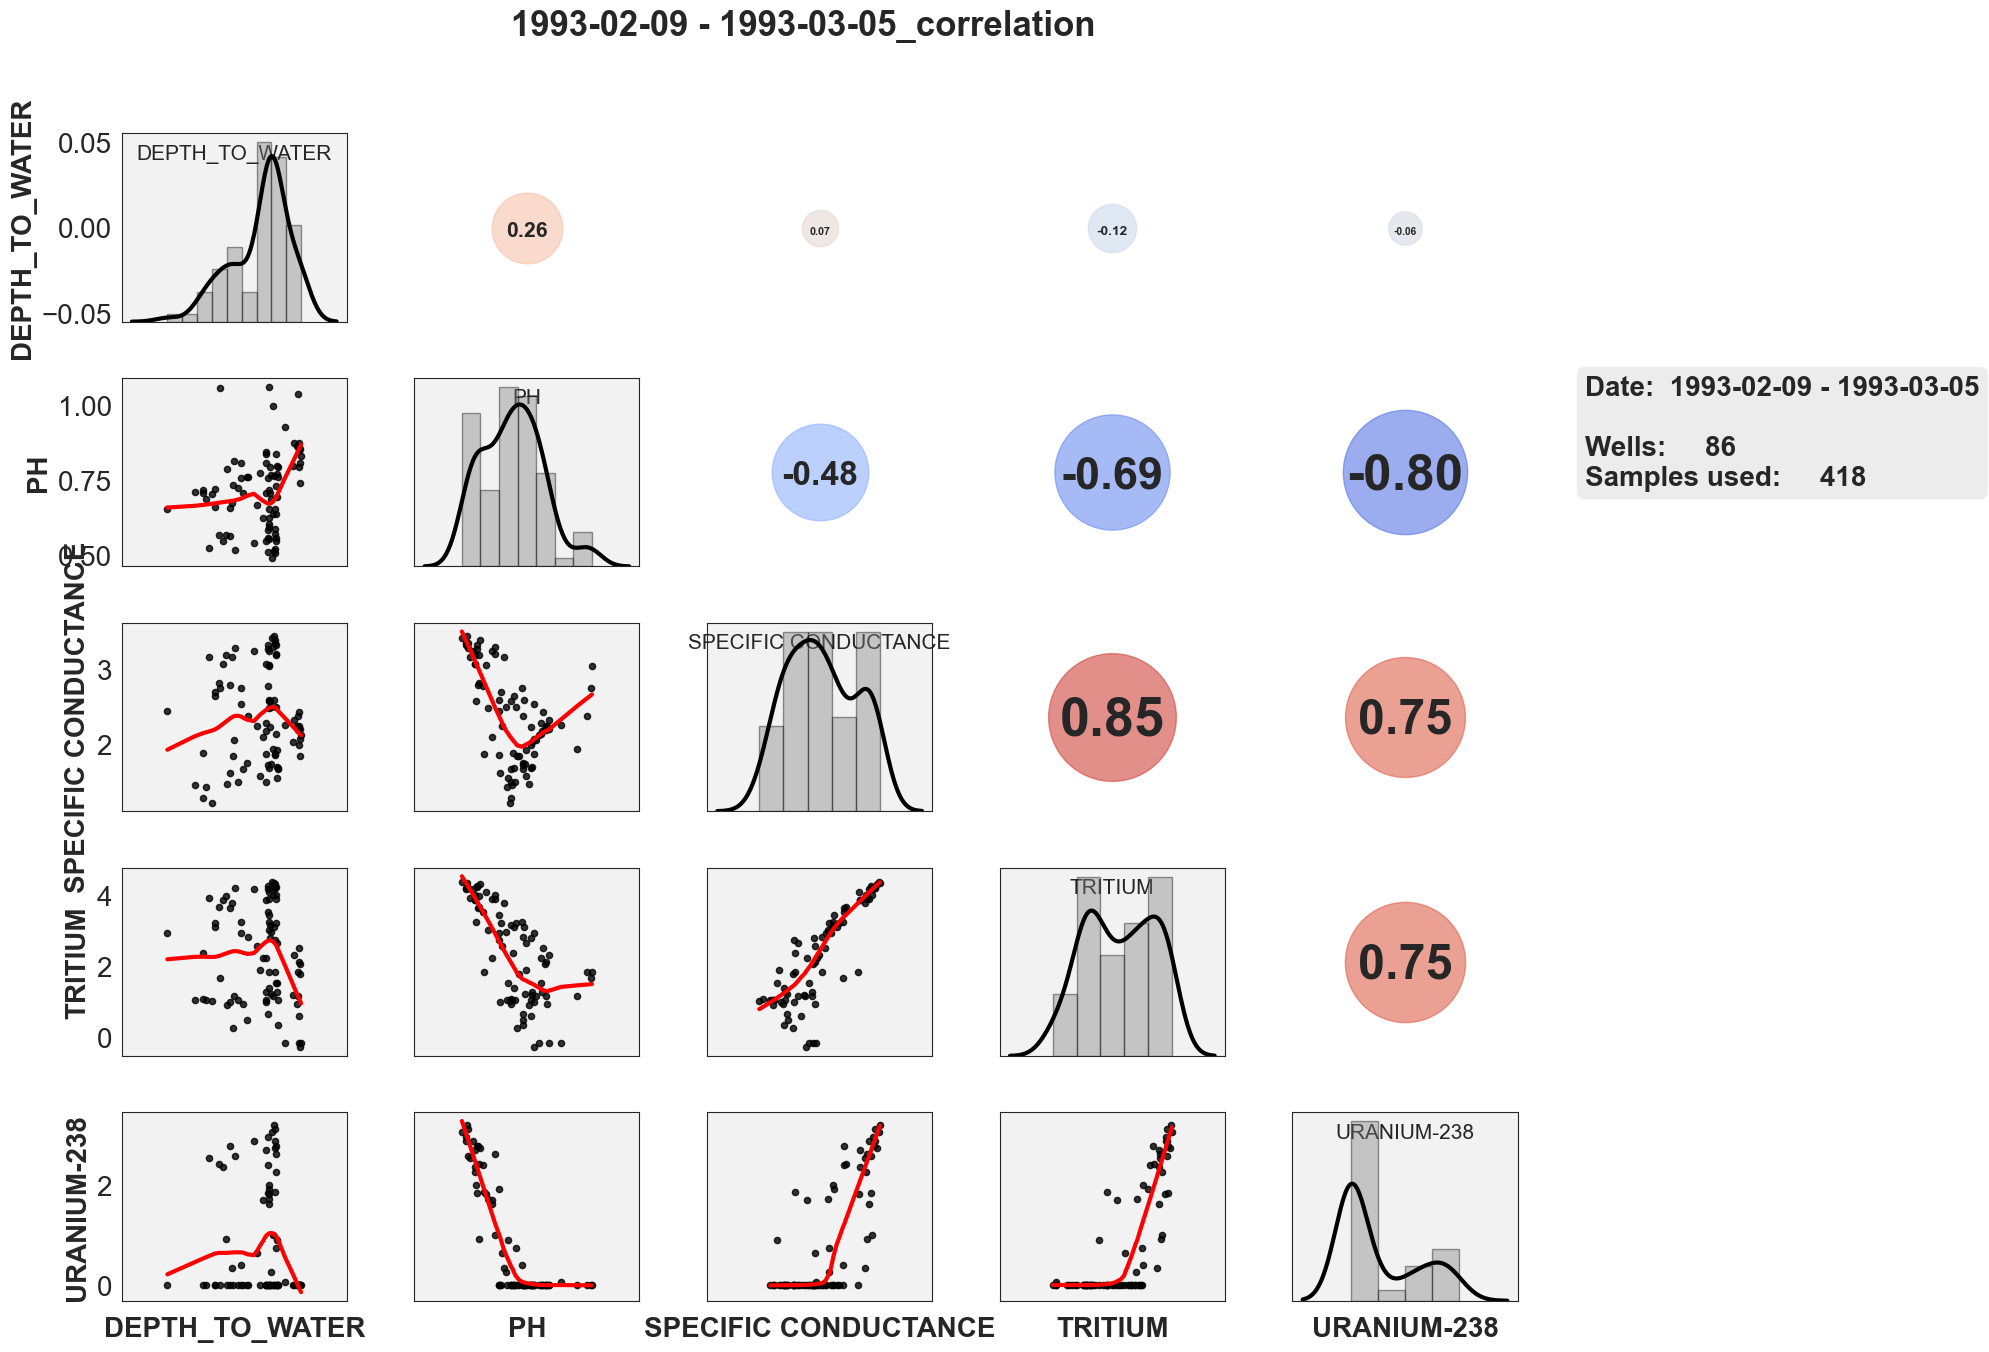

In [13]:
pylenm_df.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True)

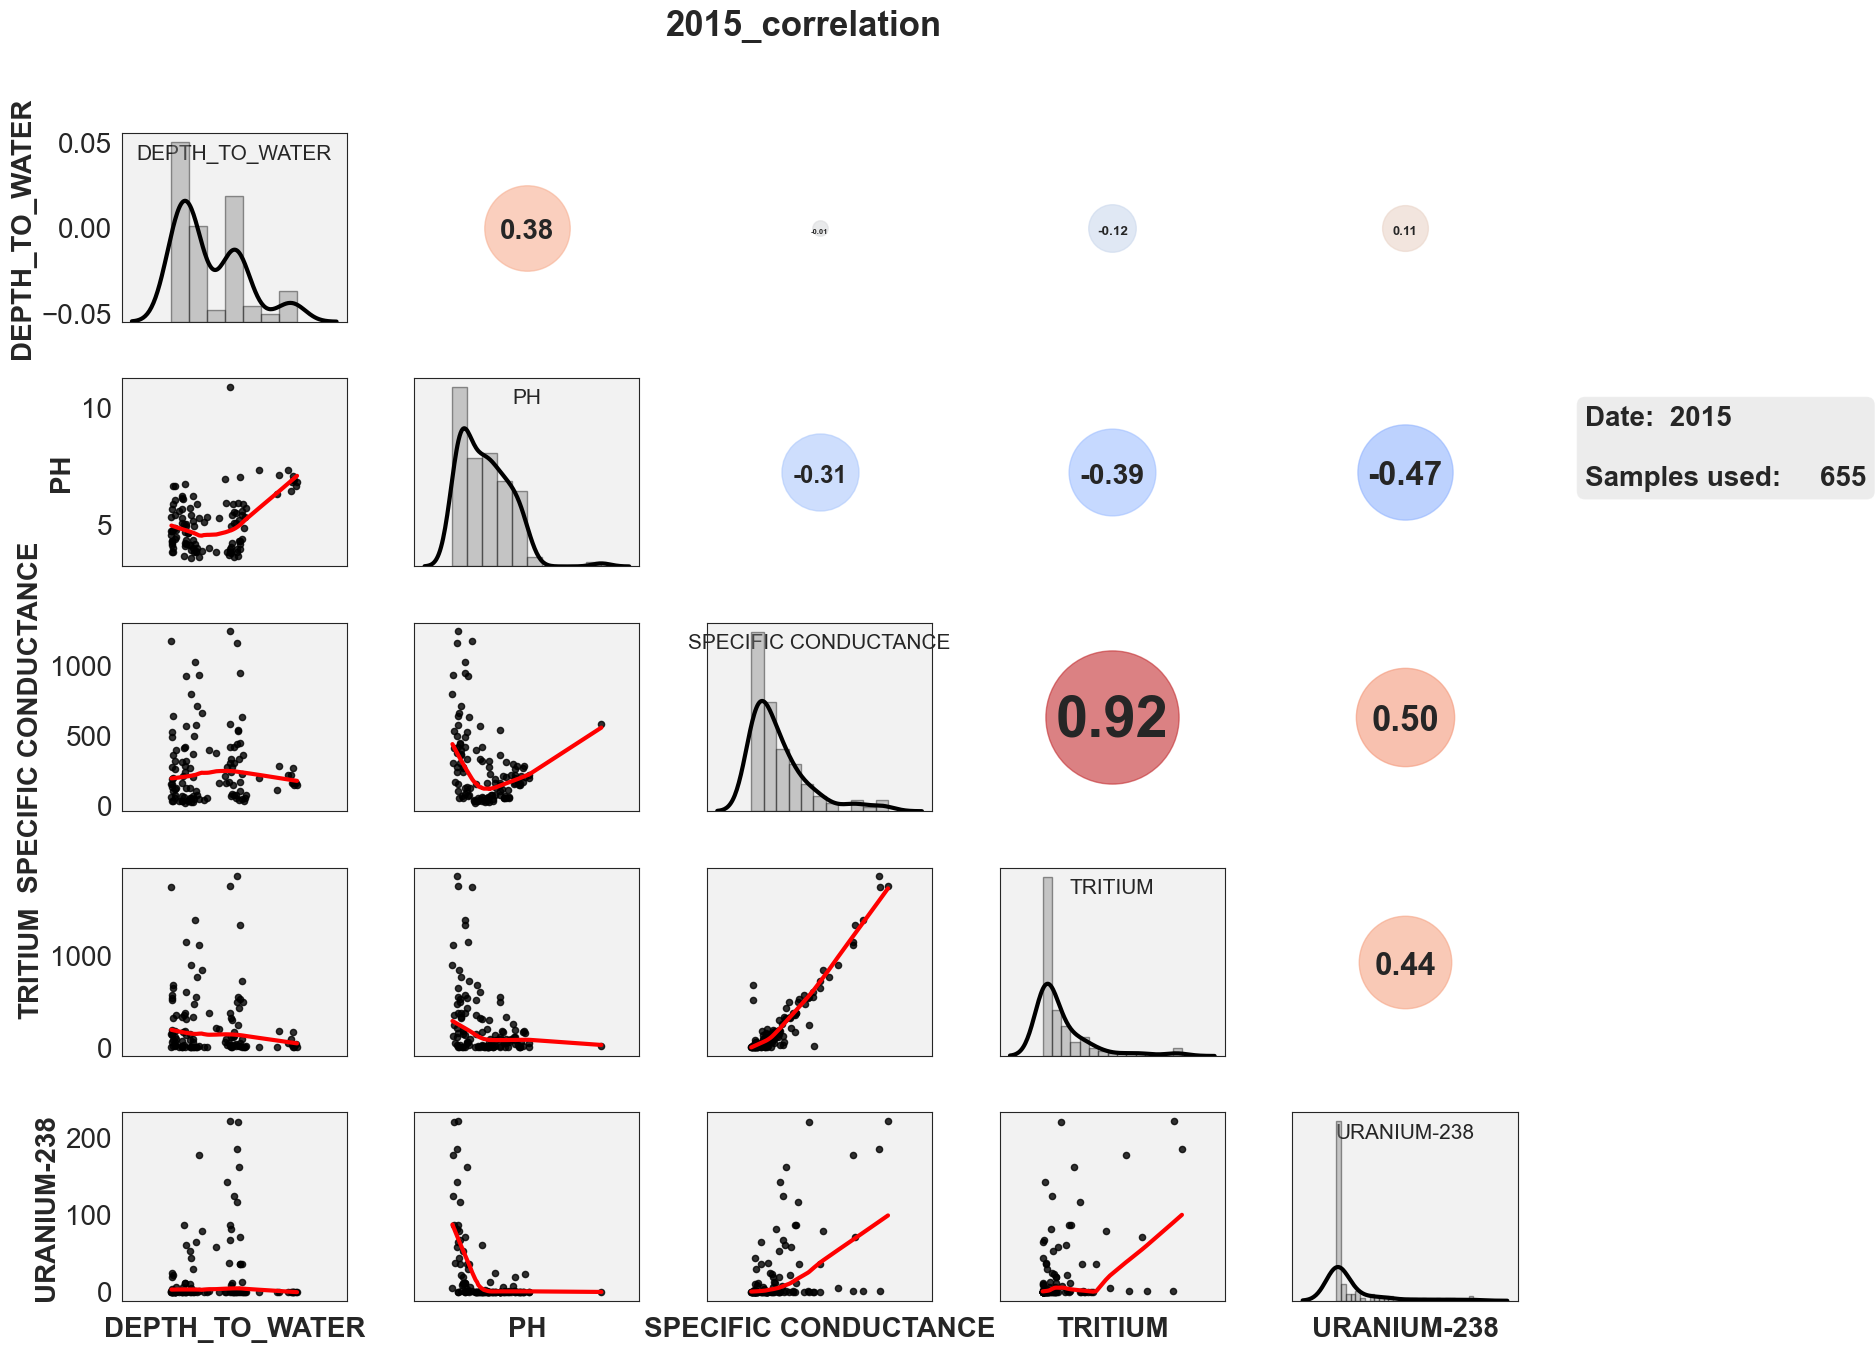

In [14]:
pylenm_df.plot_corr_by_year(2015, analytes=analytes, remove_outliers=True, z_threshold=3, no_log=['PH'])

## PCA functions

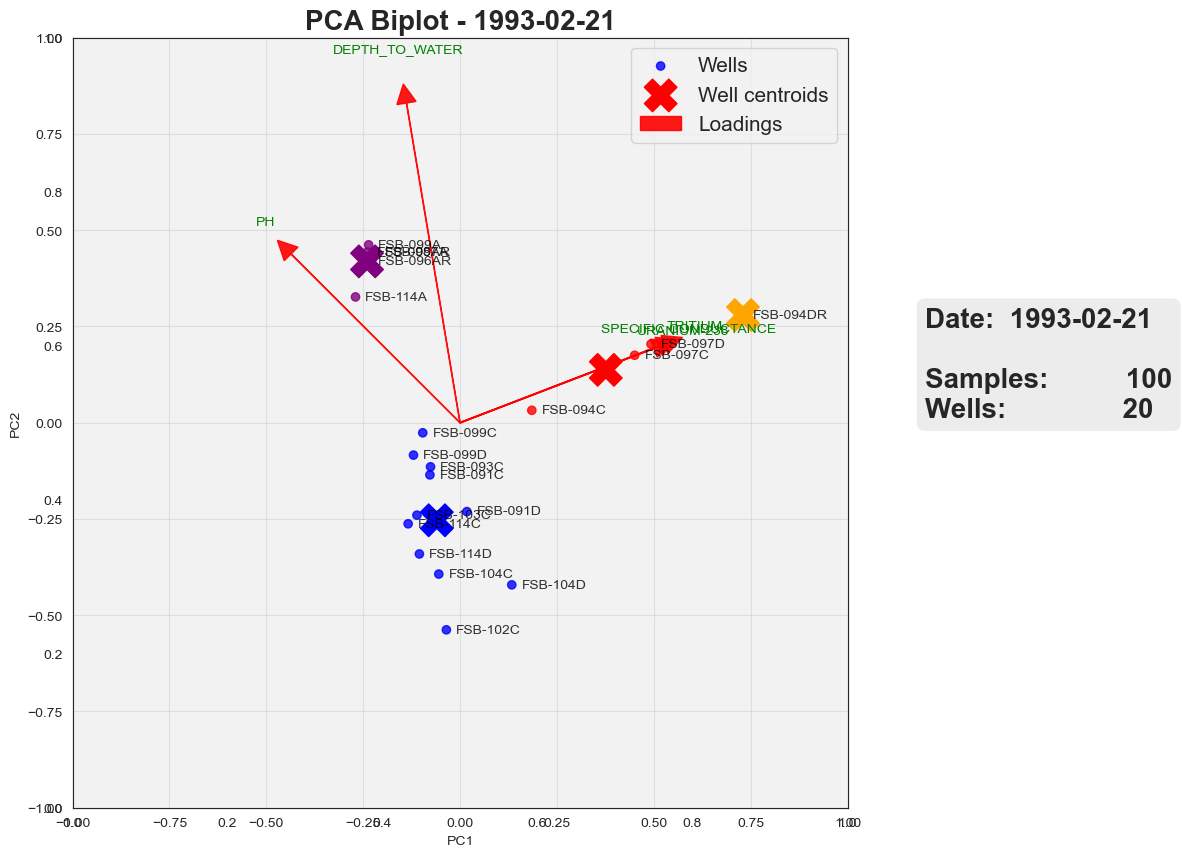

In [15]:
pylenm_df.plot_PCA_by_date('1993-02-21', analytes)

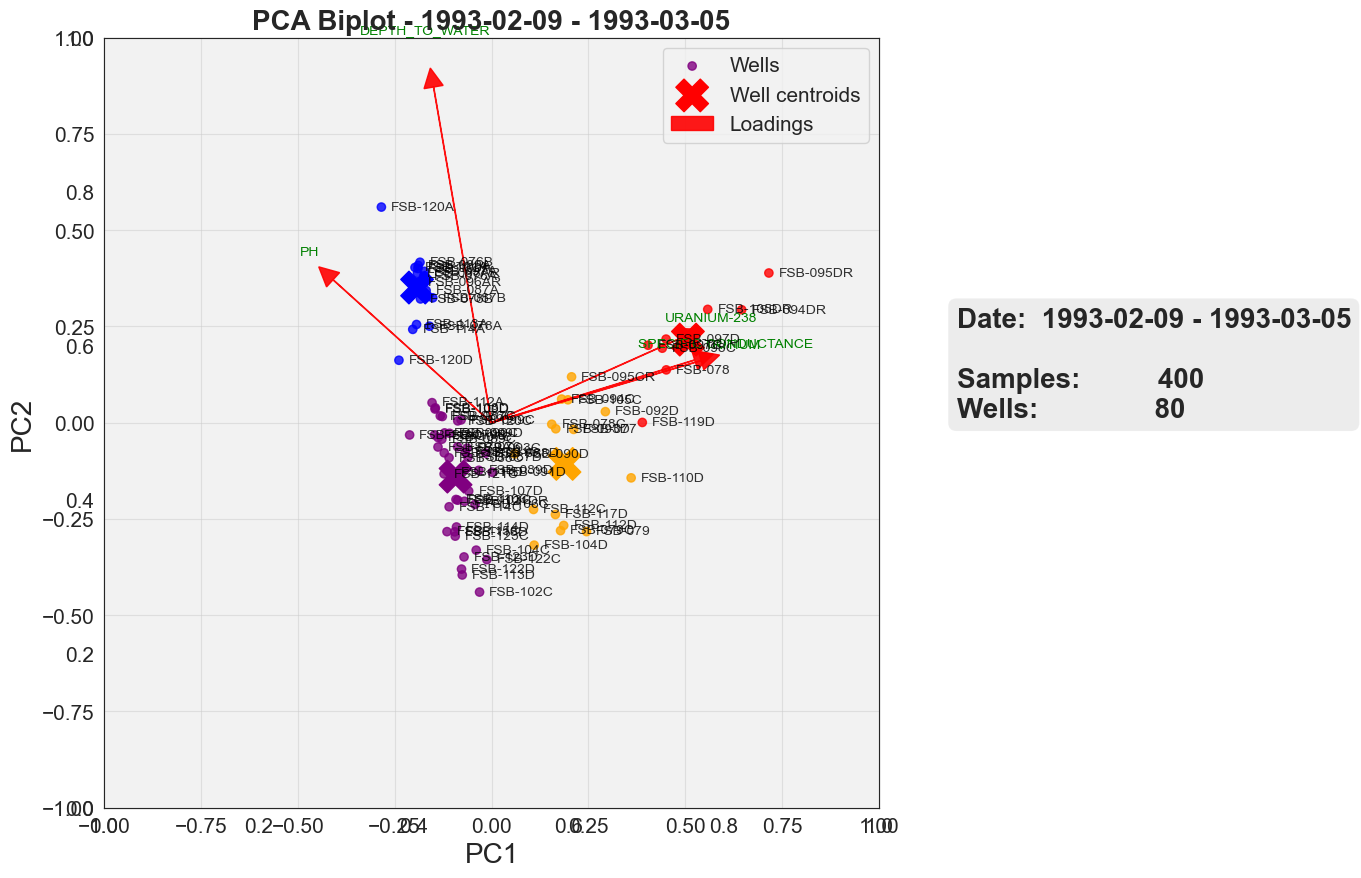

In [16]:
pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=lag)

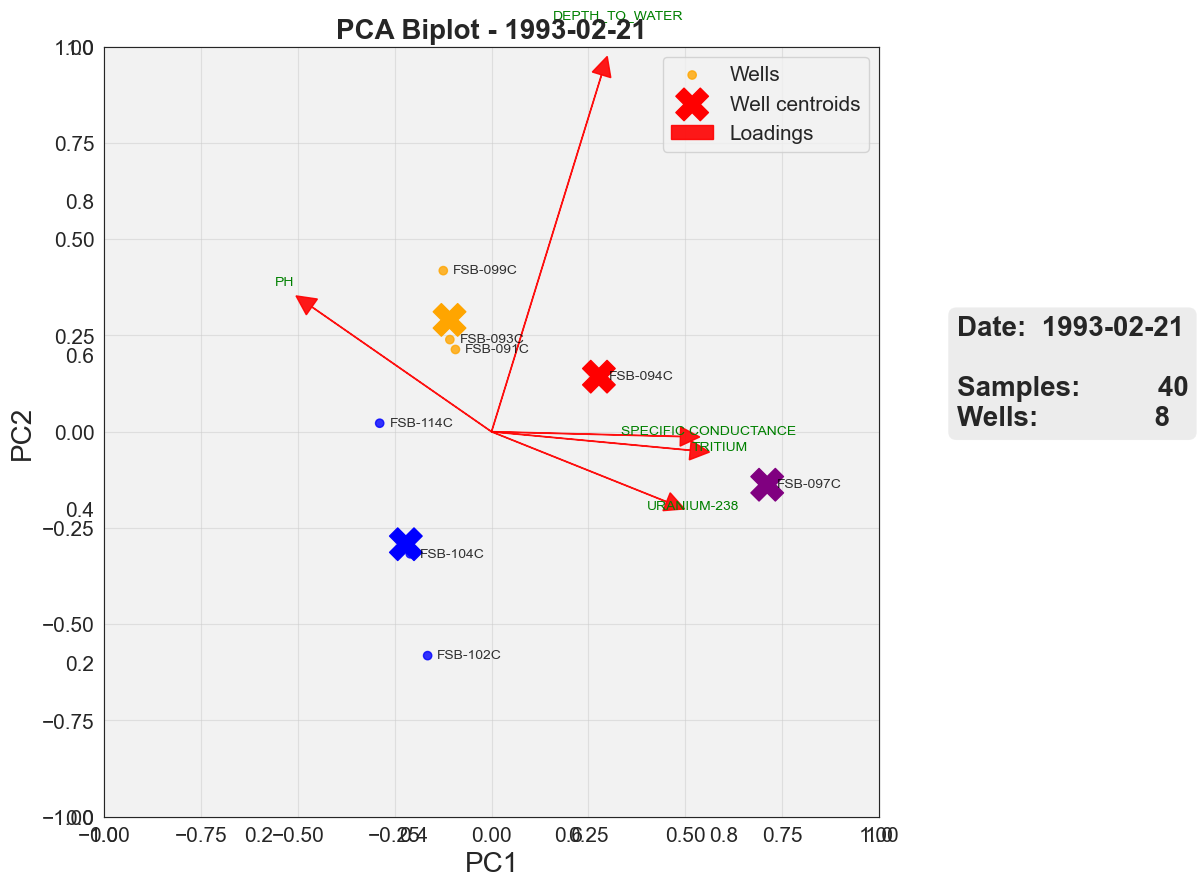

In [17]:
 pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

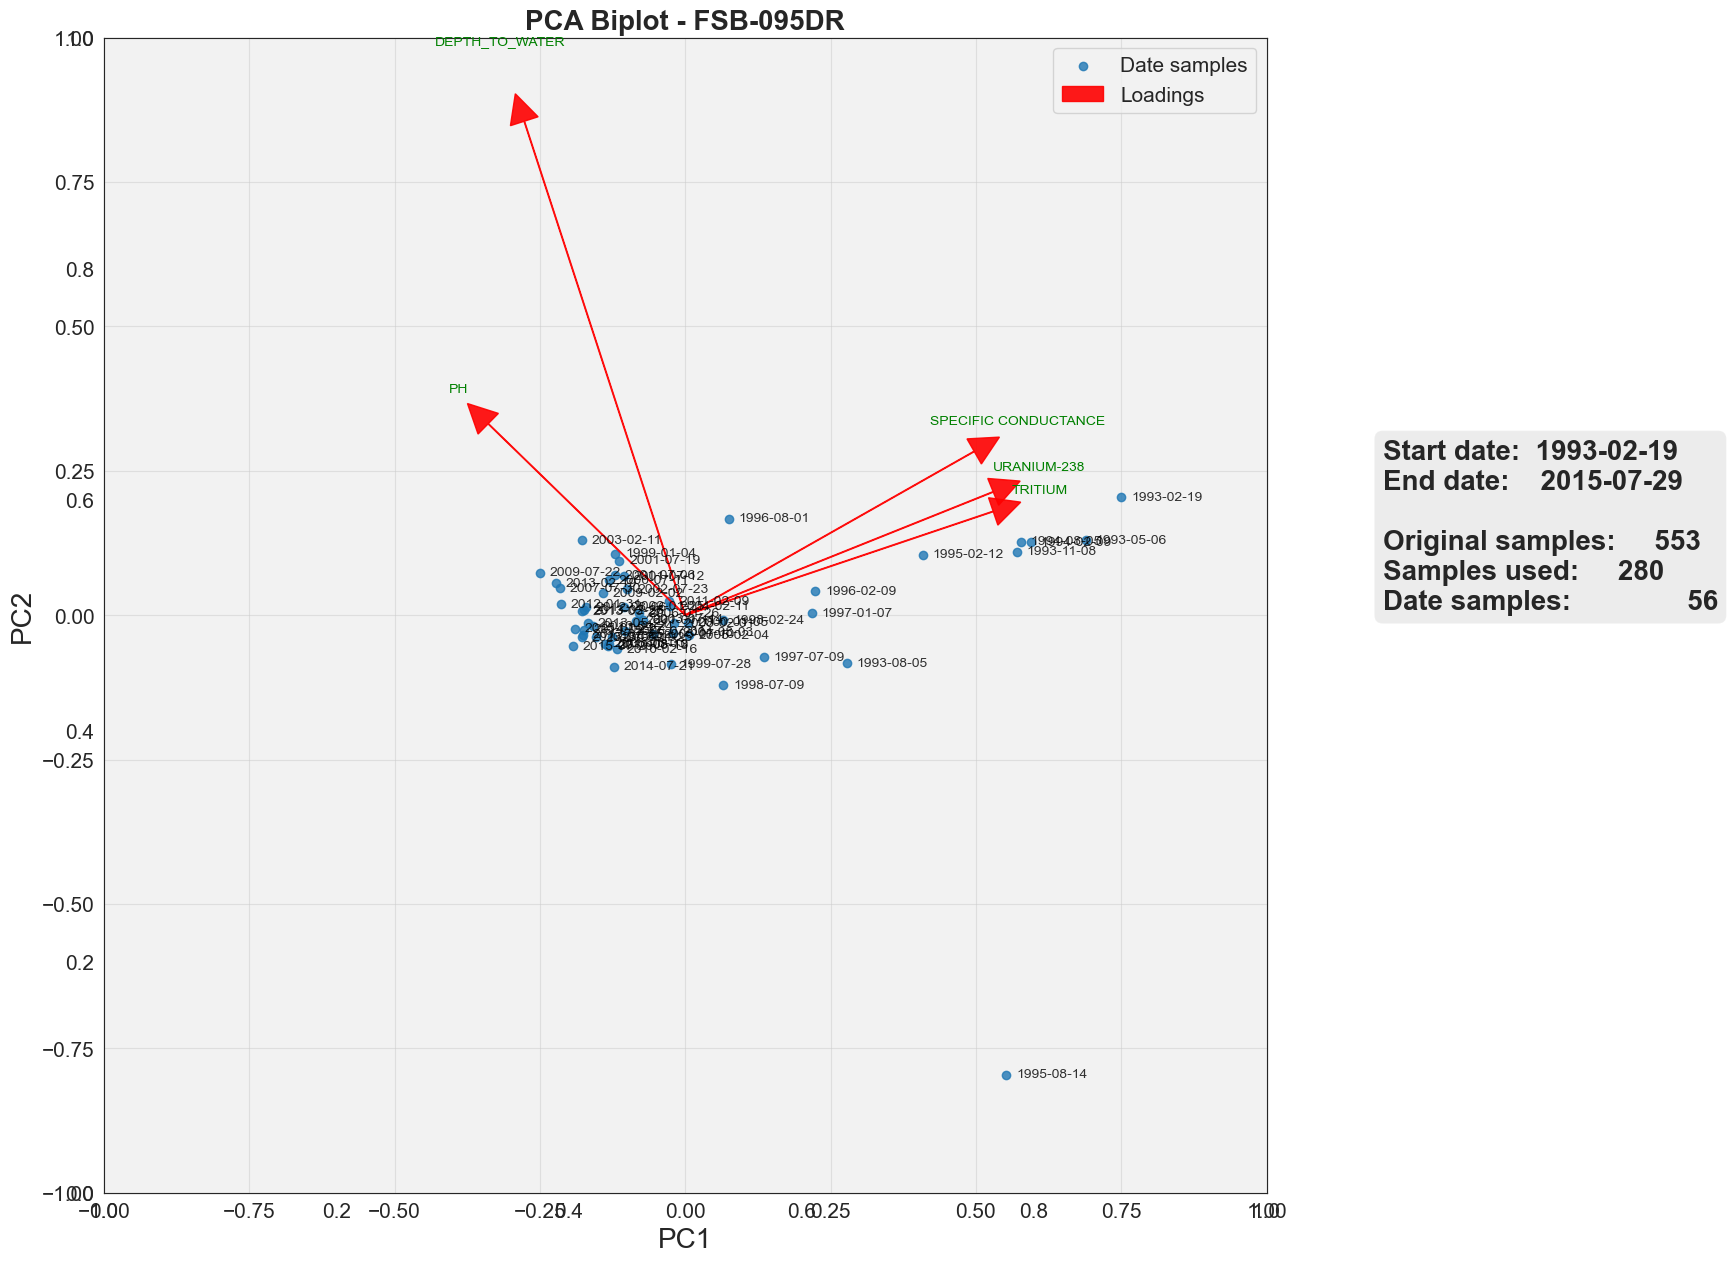

In [19]:
pylenm_df.plot_PCA_by_well(well_name='FSB-095DR', analytes=analytes)

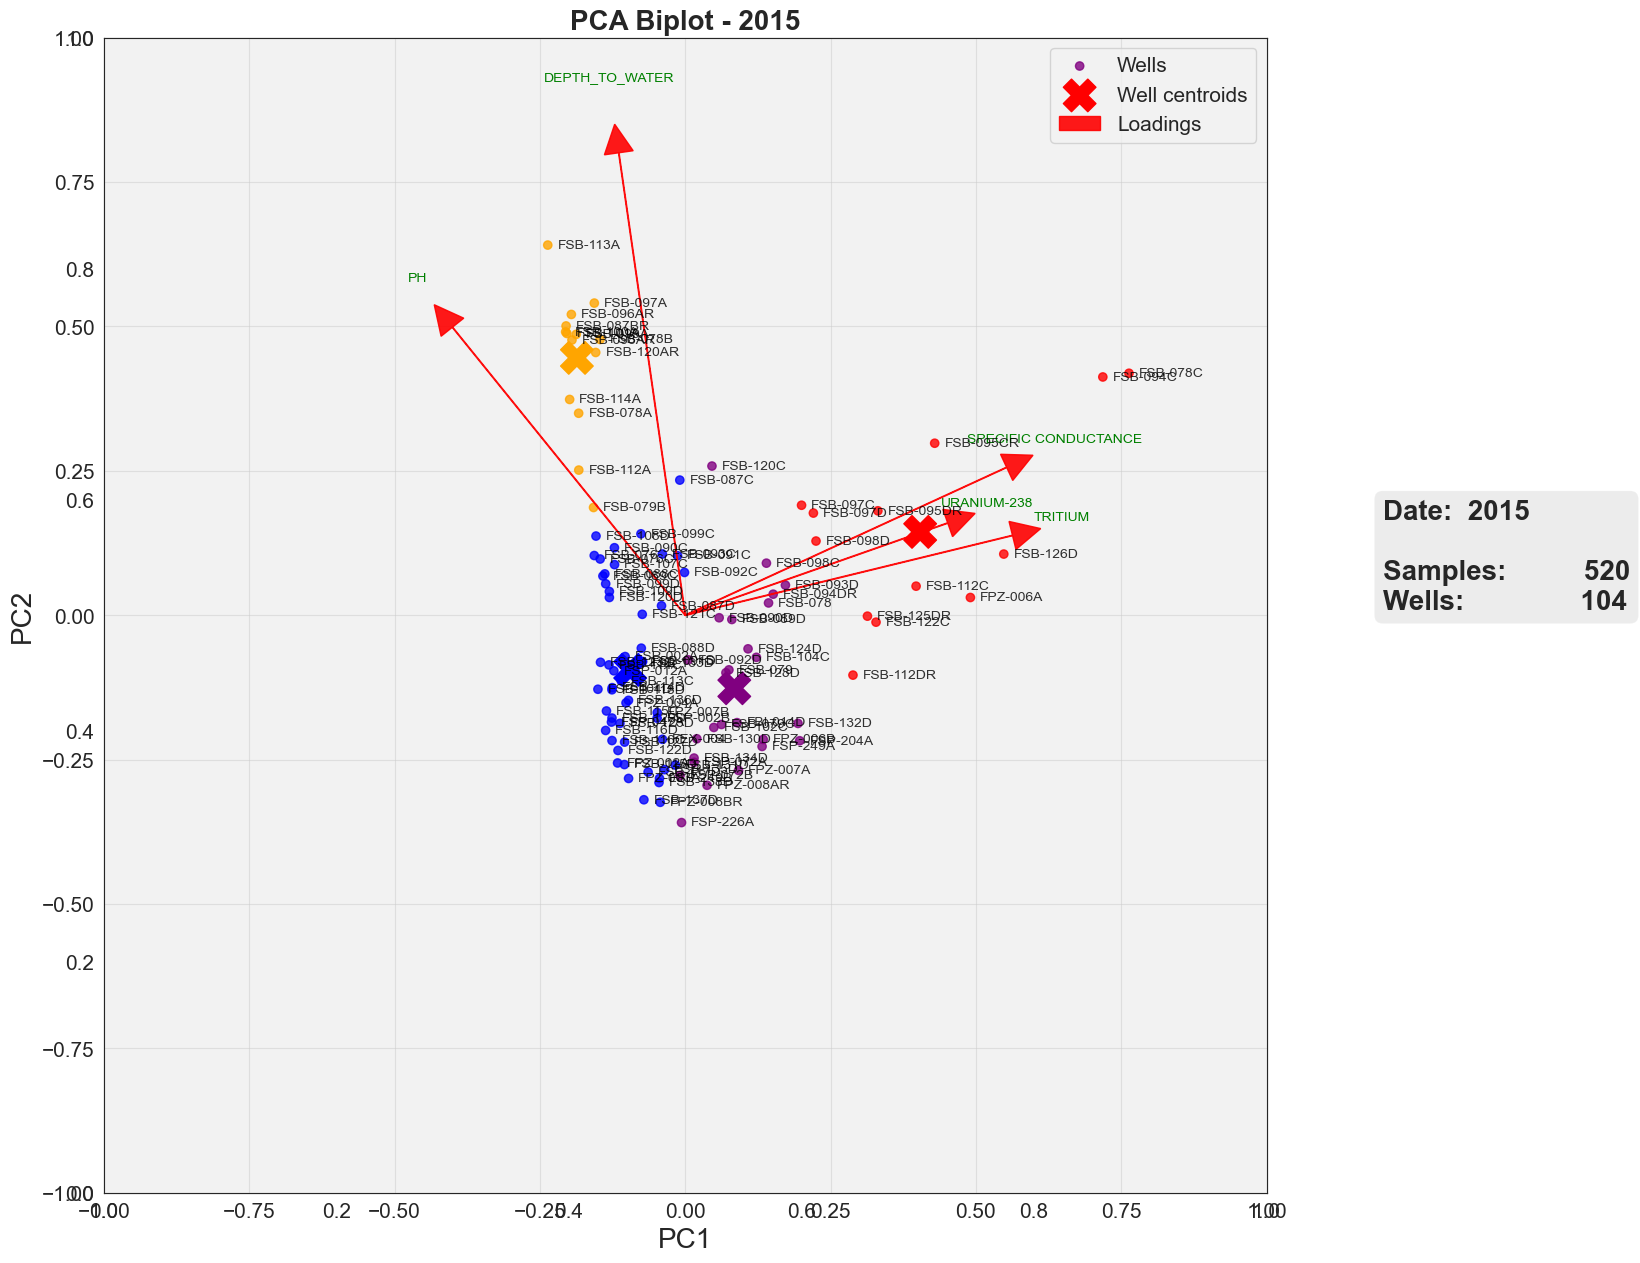

In [20]:
pylenm_df.plot_PCA_by_year(2015, analytes=analytes)

## Clustering functions

In [21]:
tritium = pylenm_df.interpolate_wells_by_analyte('TRITIUM', frequency='2W')
tritium = np.log10(tritium)
tritium = tritium.dropna(axis=1)
tritium

FAS-091   FAS-092   FAS-093   FAS-096  FBI-014D  FBI-015D  \
1990-01-07  2.442409  2.594370  2.378118  2.314603  2.967033  2.778449   
1990-01-21  2.442409  2.594370  2.378118  2.314603  2.967033  2.778449   
1990-02-04  2.442409  2.594370  2.378118  2.314603  2.967033  2.778449   
1990-02-18  2.442409  2.594370  2.378118  2.314603  2.967033  2.778449   
1990-03-04  2.442409  2.594370  2.378118  2.314603  2.967033  2.778449   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  2.294466  2.452767  2.210746  2.043087  2.465210  2.754348   
2015-08-16  2.294466  2.452537  2.210142  2.046378  2.459392  2.754348   
2015-08-30  2.294466  2.452306  2.209537  2.049644  2.459392  2.754348   
2015-09-13  2.294466  2.452075  2.208931  2.052886  2.459392  2.754348   
2015-09-27  2.294466  2.451869  2.208389  2.055760  2.459392  2.754348   

            FBI-017D   FEX-004   FIB-001   FIB-008  ...  FSP-002B  FSP-002C  \
1990-01-07  2.846947  2.688923  2.167317  3.017033  ...  2.194799  1.916614   
1990-01-21  2.846947  2.688923  2.167317  3.017033  ...  2.194799  1.916614   
1990-02-04  2.846947  2.688923  2.167317  3.017033  ...  2.194799  1.916614   
1990-02-18  2.846947  2.688923  2.167317  3.017033  ...  2.194799  1.916614   
1990-03-04  2.846947  2.688923  2.167317  3.017033  ...  2.194799  1.916614   
...              ...       ...       ...       ...  ...       ...       ...   
2015-08-02  2.743902  1.677835  2.167317  3.017033  ...  1.862569  1.916454   
2015-08-16  2.743902  1.681241  2.167317  3.017033  ...  1.849774  1.916454   
2015-08-30  2.743902  1.681241  2.167317  3.017033  ...  1.836591  1.916454   
2015-09-13  2.743902  1.681241  2.167317  3.017033  ...  1.824051  1.916454   
2015-09-27  2.743902  1.681241  2.167317  3.017033  ...  1.821514  1.916454   

            FSP-012A  FSP-047A  FSP-072A  FSP-072B  FSP-204A  FSP-226A  \
1990-01-07  1.981405  2.721239  3.433601  3.200344  3.241746  2.219083   
1990-01-21  1.981405  2.721239  3.433601  3.200344  3.241746  2.219083   
1990-02-04  1.981405  2.721239  3.433601  3.200344  3.241746  2.219083   
1990-02-18  1.981405  2.721239  3.433601  3.200344  3.241746  2.219083   
1990-03-04  1.981405  2.721239  3.433601  3.200344  3.241746  2.219083   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  1.843940  1.526339  2.784718  2.697517  2.851386  2.167317   
2015-08-16  1.829459  1.526339  2.777979  2.701056  2.864909  2.167317   
2015-08-30  1.814479  1.526339  2.771134  2.704567  2.878023  2.167317   
2015-09-13  1.800170  1.526339  2.764716  2.707784  2.889791  2.167317   
2015-09-27  1.797268  1.526339  2.763428  2.708421  2.892095  2.167317   

            FSP-249A  FSP-249B  
1990-01-07  3.031973  2.667671  
1990-01-21  3.031973  2.667671  
1990-02-04  3.031973  2.667671  
1990-02-18  3.031973  2.667671  
1990-03-04  3.031973  2.667671  
...              ...       ...  
2015-08-02  2.732571  2.152420  
2015-08-16  2.730995  2.153339  
2015-08-30  2.729413  2.154257  
2015-09-13  2.727907  2.155126  
2015-09-27  2.727541  2.155336  

[672 rows x 154 columns]

### Quick data check


In [23]:
# modified to accomodate the deprecated .append()

elements = tritium.shape[0]
data_list = []  # List to collect records instead of appending row-by-row
rptData = pd.DataFrame(columns=['station_id', 'ratio_repeated'])
for well in tritium.columns:
    try:
        occurance = tritium[well].duplicated().value_counts()[True]
    except KeyError:
        occurance = 0
    
    # Collect each row as a dictionary
    data_list.append({'station_id': well, 'ratio_repeated': occurance/elements})

# Convert list of dictionaries to a DataFrame efficiently
rptData = pd.DataFrame(data_list)

std_ratio = rptData.describe().T['std'].values[0]
bad_wells = rptData[rptData['ratio_repeated']>1.5*std_ratio]
bad_well_names = bad_wells.station_id.to_list()
print("Bad wells: {}\nRemaining wells: {}".format(len(bad_well_names),elements-len(bad_well_names)))
tritium = tritium.drop(bad_well_names, axis=1)

Bad wells: 57
Remaining wells: 615


(672, 97)
(312, 97)


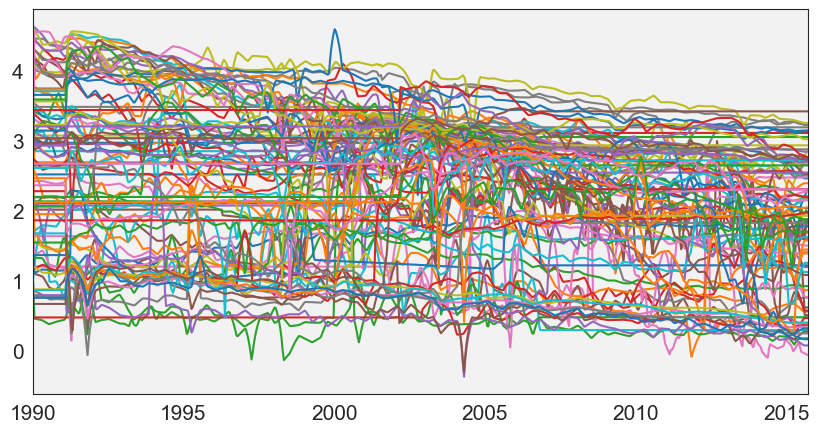

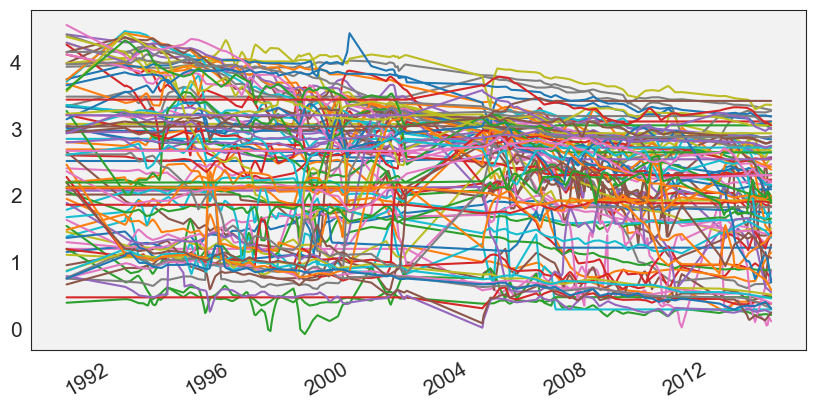

In [24]:
tritium.plot(legend=False, figsize=(10,5))
pylenm_df.remove_outliers(tritium, z_threshold=2.5).plot(legend=False, figsize=(10,5))
tritium_rm = pylenm_df.remove_outliers(tritium, z_threshold=2.5)
print(tritium.shape)
print(tritium_rm.shape)

In [22]:
pylenm_df.get_Construction_Data().head()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

               STATION_TYPE               WELL USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   

                        WELL_USE   LATITUDE  LONGITUDE     EASTING  ...  \
STATION_ID                                                          ...   
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564  ...   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781  ...   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432  ...   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928  ...   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287  ...   

            SZ_BOT(FT MSL)  GROUND_ELEVATION  REFERENCE_ELEVATION_CODE  \
STATION_ID                                                               
FAI001A             231.30             250.1                         C   
FAI001B             240.60             250.2                         C   
FAI001C             242.68             250.2                         C   
FAI001D             246.75             250.1                         C   
FAI002A             165.88             185.1                         C   

            REFERENCE_ELEVATION TOTAL_DEPTH  CONSTR_OBJ_DIAMETER  \
STATION_ID                                                         
FAI001A                  252.63       19.10                  2.0   
FAI001B                  252.73        9.90                  2.0   
FAI001C                  252.74        7.82                  2.0   
FAI001D                  252.56        3.65                  2.0   
FAI002A                  187.58        3.65                  2.0   

            CONSTR_OBJ_MATERIAL  PUMP_TYPE COMPLETION_DATE DATE_SEALED  
STATION_ID                                                              
FAI001A                     PVC       NONE      2016-03-22         NaT  
FAI001B                     PVC       NONE      2016-03-22         NaT  
FAI001C                     PVC       NONE      2016-03-22         NaT  
FAI001D                     PVC       NONE      2016-03-22         NaT  
FAI002A                     PVC       NONE      2016-03-29         NaT  

[5 rows x 22 columns]

### Clustering stations (wells)

['FPZ-007B', 'FPZ-006B', 'FSB-099D', 'FEX-004', 'FPZ-007A', 'FSB-087D', 'FSB-118D', 'FSB-108D', 'FSP-072A', 'FSB-089D', 'FSB-098D', 'FSP-002B', 'FPZ-006A', 'FSB-092D', 'FSB-091D', 'FSB-114D', 'FSB-109D', 'FSP-002A', 'FSB-093D', 'FSB-095DR', 'FSB-078', 'FSB-090D', 'FSB-076', 'FSB-079', 'FSP-249A', 'FSB-123D', 'FBI-014D', 'FSB-120D', 'FSB-104D', 'FSB-115D', 'FSB-094DR', 'FSB-097D', 'FSB-113D', 'FSP-072B', 'FSP-249B', 'FSB-117D', 'FPZ-002A', 'FSB-116D', 'FSB-122D', 'FSB-088D']


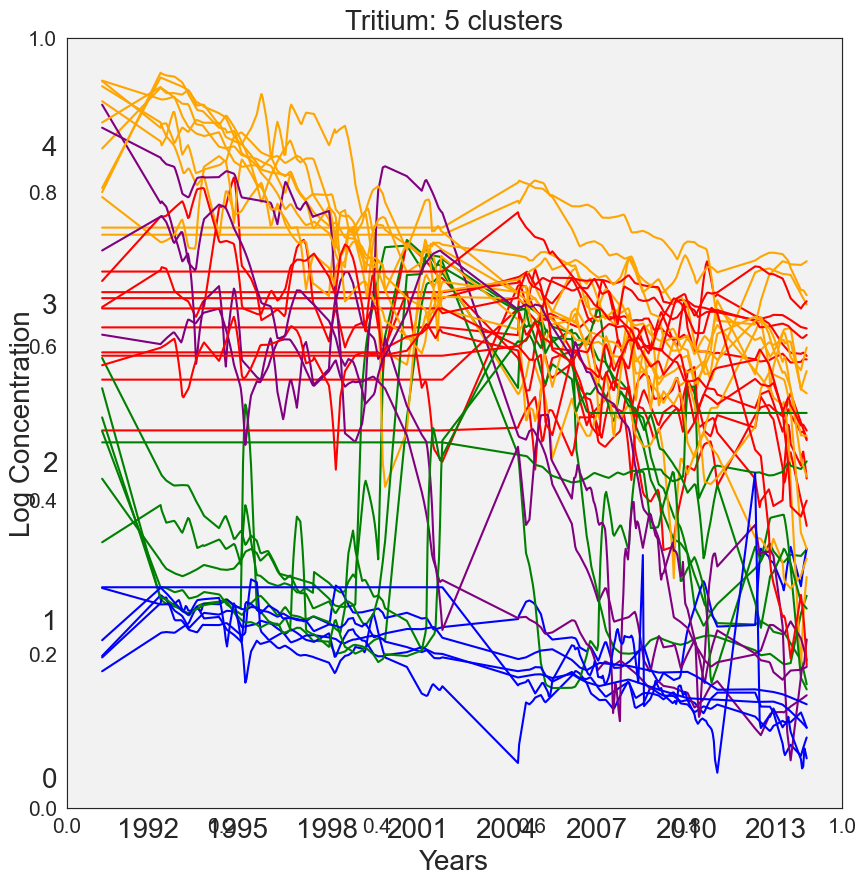

In [25]:
cluster_data = pylenm_df.cluster_data(analyte_name= 'Tritium', data = tritium_rm, n_clusters=5, year_interval=3, return_clusters=True, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], y_label = 'Log Concentration')

In [26]:
cluster_data[['STATION_ID', 'color']].head()

STATION_ID   color
0   FBI-014D     red
1    FEX-004     red
2   FPZ-002A    blue
3   FPZ-006A  orange
4   FPZ-006B     red

In [27]:
pylenm_df.plot_coordinates_to_map(cluster_data)